In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
X = np.load('X.npy')
y = np.load('Y.npy')

In [14]:
X.shape

(2062, 64, 64)

(-0.5, 63.5, 63.5, -0.5)

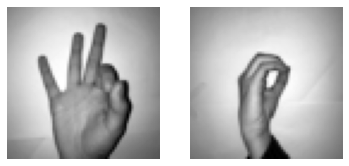

In [39]:
img_size = 64
plt.subplot(1,2,1)
plt.imshow(X[100].reshape(img_size,img_size),cmap="gray")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(X[300].reshape(img_size,img_size),cmap="gray")
plt.axis('off')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
x_train.shape

(1649, 64, 64)

In [16]:
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

In [18]:
x_train.shape

(1649, 64, 64, 1)

In [22]:
input_shape=x_train.shape[1:]

In [23]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )
model.add(Conv2D(filters = 32, kernel_size = (3,3) ,padding = "Same" ,activation = "relu", 
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )
model.add(Conv2D(filters = 64, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )
model.add(Conv2D(filters = 128, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 256, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0

In [26]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [57]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
52/52 [==============================] - 15s 283ms/step - loss: 0.0082 - accuracy: 0.9970 - val_loss: 0.1386 - val_accuracy: 0.9855
Epoch 2/100
52/52 [==============================] - 14s 276ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.1158 - val_accuracy: 0.9855
Epoch 3/100
52/52 [==============================] - 14s 272ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.1191 - val_accuracy: 0.9831
Epoch 4/100
52/52 [==============================] - 14s 268ms/step - loss: 0.0060 - accuracy: 0.9988 - val_loss: 0.1134 - val_accuracy: 0.9855
Epoch 5/100
52/52 [==============================] - 15s 289ms/step - loss: 0.0044 - accuracy: 0.9982 - val_loss: 0.1174 - val_accuracy: 0.9855
Epoch 6/100
52/52 [==============================] - 15s 284ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.1229 - val_accuracy: 0.9855
Epoch 7/100
52/52 [==============================] - 15s 281ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.1272 - val_accuracy:

In [58]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 42ms/step - loss: 0.1184 - accuracy: 0.9855


[0.11840789765119553, 0.9854721426963806]

In [59]:
model.evaluate(x_train,y_train)

52/52 [==============================] - 2s 41ms/step - loss: 1.0019e-07 - accuracy: 1.0000


[1.00191172691666e-07, 1.0]

class: 3


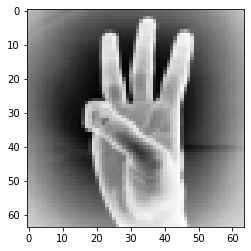

In [82]:
image_index = 15
plt.imshow(x_test[image_index].reshape(64, 64),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(-1, 64, 64, 1))
print("class:" , pred.argmax())